In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_data.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0,SP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df['sales'] = df.iloc[:,9:15].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Country,sales
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0,CA,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0,SP,91


In [6]:
sales1 = np.random.choice(df[df['AcceptedCmp1']  == 1]['sales'], size=25, replace=False)
sales2 = np.random.choice(df[df['AcceptedCmp2']  == 1]['sales'], size=25, replace=False)
sales3 = np.random.choice(df[df['AcceptedCmp3']  == 1]['sales'], size=25, replace=False)
sales4 = np.random.choice(df[df['AcceptedCmp4']  == 1]['sales'], size=25, replace=False)
sales5 = np.random.choice(df[df['AcceptedCmp5']  == 1]['sales'], size=25, replace=False)



# H0: sales of campaign 1 is equal to sales of campaign 2
# Ha: sales of campaign 1 is not equal to sales of campaign 2
# with confidence level 95%

In [7]:
t_statistic12, p_value12 = ttest_ind(sales1, sales2)

if p_value12 < 0.05:
    print("There is a significant difference in sales performance between the two campaigns.")
else:
    print("There is no significant difference in sales performance between the two campaigns.")

There is a significant difference in sales performance between the two campaigns.


### it seems that campaign 1 and campaign 2 have the same sales performance , so its logical to compare other campaigns to any of them.

<Axes: >

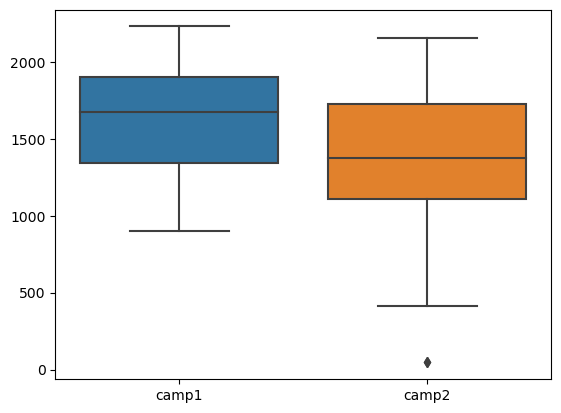

In [8]:
cmp1_2 = pd.DataFrame({'camp1' : sales1 , 'camp2' : sales2})
sns.boxplot(data=cmp1_2)

# H0: sales of campaign 1 is equal to sales of campaign 3
# Ha: sales of campaign 1 is not equal to sales of campaign 3
# with confidence level 95%

In [9]:
t_statistic13, p_value13 = ttest_ind(sales1, sales3)

if p_value13 < 0.05:
    print("There is a significant difference in sales performance between the two campaigns.")
else:
    print("There is no significant difference in sales performance between the two campaigns.")

There is a significant difference in sales performance between the two campaigns.


## there is a difference in sales performance , does the third campaign have lower or higher sales ?

In [10]:
if t_statistic13 < 0:
    print("campaign 1 have LOWER sales than campaign 3.")
else: 
    print("campaign 1 have HIGHER sales than campaign 3.")

campaign 1 have HIGHER sales than campaign 3.


<Axes: >

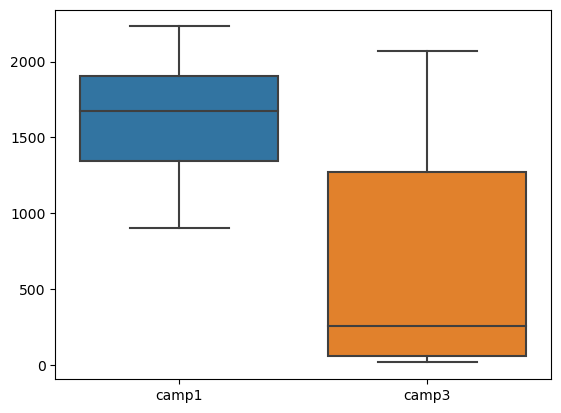

In [11]:
cmp1_3 = pd.DataFrame({'camp1' : sales1 , 'camp3' : sales3})
sns.boxplot(data=cmp1_3)

# H0: sales of campaign 1 is equal to sales of campaign 4
# Ha: sales of campaign 1 is not equal to sales of campaign 4
# with confidence level 95%

In [12]:
t_statistic14, p_value14 = ttest_ind(sales1, sales4)

if p_value13 < 0.05:
    print("There is a significant difference in sales performance between the two campaigns.")
else:
    print("There is no significant difference in sales performance between the two campaigns.")

There is a significant difference in sales performance between the two campaigns.


In [13]:
if t_statistic14 < 0: 
    print("campaign 1 have LOWER sales than campaign 4.")
else: 
    print("campaign 1 have HIGHER sales than campaign 4.")

campaign 1 have HIGHER sales than campaign 4.


<Axes: >

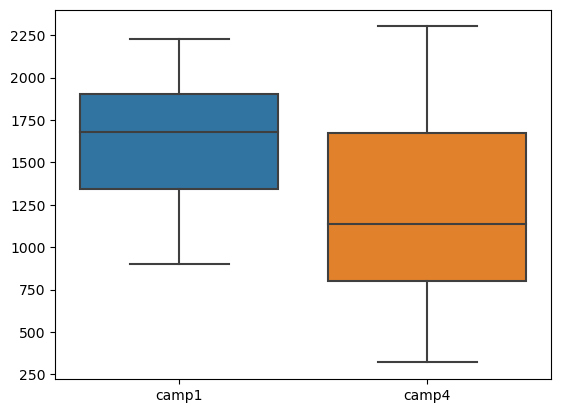

In [14]:
cmp1_4 = pd.DataFrame({'camp1' : sales1 , 'camp4' : sales4})
sns.boxplot(data=cmp1_4)

# H0: sales of campaign 1 is equal to sales of campaign 5
# Ha: sales of campaign 1 is not equal to sales of campaign 5
# with confidence level 95%

In [15]:
t_statistic15, p_value15 = ttest_ind(sales1, sales5)

if p_value13 < 0.05:
    print("There is a significant difference in sales performance between the two campaigns.")
else:
    print("There is no significant difference in sales performance between the two campaigns.")

There is a significant difference in sales performance between the two campaigns.


In [16]:
if t_statistic15 < 0: 
    print("campaign 1 have LOWER sales than campaign 5.")
else: 
    print("campaign 1 have HIGHER sales than campaign 5.")

campaign 1 have LOWER sales than campaign 5.


<Axes: >

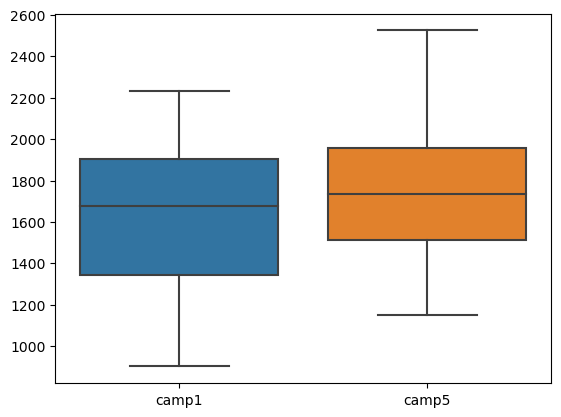

In [17]:
cmp1_5 = pd.DataFrame({'camp1' : sales1 , 'camp5' : sales5})
sns.boxplot(data=cmp1_5)

# campaign 5 is higher than campaign 1 , but not that much 

<Axes: >

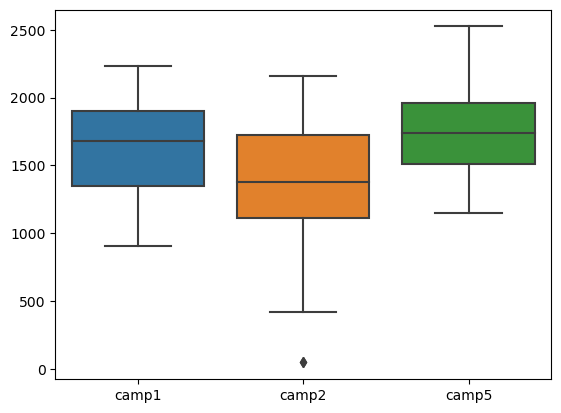

In [18]:
cmp1_2_5 = pd.DataFrame({'camp1' : sales1 , 'camp2' : sales2 , 'camp5' : sales5})
sns.boxplot(data=cmp1_2_5)

# Based on the statistical analysis of the sales data for the five campaigns using a two-sample t-test, it can be concluded that the fifth campaign generated the highest total sales compared to the other four campaigns. However, the difference in sales between the first, second, and fifth campaigns was not statistically significant. Therefore, although the fifth campaign had the highest sales, the first, second, and fifth campaigns can be considered as the best-performing campaigns in terms of sales performance. This conclusion is based on the appropriate statistical analysis of the sales data and a predetermined level of significance, indicating that the observed differences in sales are unlikely to have occurred by chance.